In [ ]:
#Preliminary Analysis

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
PriorOrders = pd.read_csv('C:/Users/adnan/Downloads/priorordersmerged2.csv')

In [3]:
# Function to categorize hours
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'


In [4]:
PriorOrders['DayPeriod'] = PriorOrders['order_hour_of_day'].apply(categorize_hour)

In [5]:
# Define a dictionary to map the integer day of the week to the corresponding day name
day_of_week_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Use the map() function to replace the integer values in the 'order_dow' column with the corresponding day names
PriorOrders['order_dow'] = PriorOrders['order_dow'].map(day_of_week_mapping)

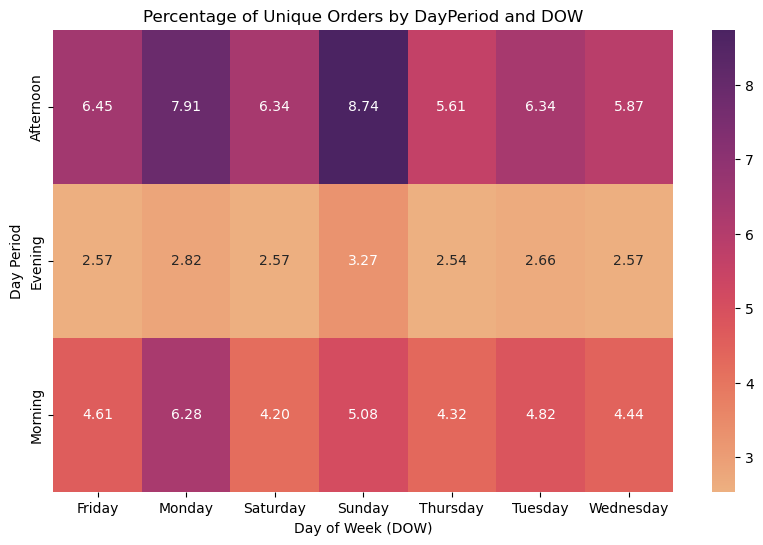

In [6]:



# Group the data and count the number of unique order IDs for each combination
order_counts = PriorOrders.groupby(['DayPeriod', 'order_dow'])['order_id'].nunique().reset_index()

# Define the custom order of days of the week
custom_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert the 'order_dow' column to a categorical data type with the custom order
PriorOrders['order_dow'] = pd.Categorical(PriorOrders['order_dow'], categories=custom_order, ordered=True)

# Define the custom order of days of the week
custom_orderdayperiod = ['Morning', 'Afternoon', 'Evening']

# Convert the 'order_dow' column to a categorical data type with the custom order
PriorOrders['DayPeriod'] = pd.Categorical(PriorOrders['DayPeriod'], categories=custom_orderdayperiod, ordered=True)



# Create a pivot table with 'DayPeriod' as rows and 'order_dow' as columns
pivot_table = order_counts.pivot(index='DayPeriod', columns='order_dow', values='order_id')

# Calculate the total number of unique order IDs in the pivot table
total_orders = pivot_table.sum().sum()

# Calculate the percentages by dividing the values in the pivot table by the total number of unique order IDs
percentages = (pivot_table / total_orders) * 100

cornell_colors = sns.color_palette("flare", as_cmap=True)

# Create the heatmap with percentages
plt.figure(figsize=(10, 6))
sns.heatmap(percentages, annot=True, fmt='.2f', cmap=cornell_colors)
plt.title('Percentage of Unique Orders by DayPeriod and DOW')
plt.xlabel('Day of Week (DOW)')
plt.ylabel('Day Period')
plt.show()

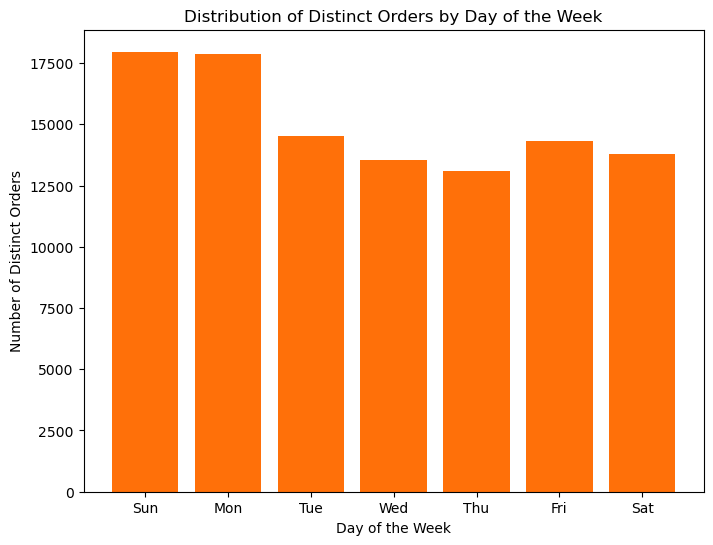

In [8]:
distinct_orders_by_dow = PriorOrders.groupby('order_dow')['order_id'].nunique()

# Create a bar plot (histogram) to visualize the distribution
plt.figure(figsize=(8, 6))
plt.bar(distinct_orders_by_dow.index, distinct_orders_by_dow.values, color='#FF7009')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Distinct Orders')
plt.title('Distribution of Distinct Orders by Day of the Week')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])  # Replace with custom day labels if needed
plt.show()

In [9]:
distinct_orders = PriorOrders.drop_duplicates(subset='order_id', keep='first')
distinct_orders
#105081 Prior Orders
distinct_departments = PriorOrders.drop_duplicates(subset='department', keep='first')
distinct_departments
#21 Departments
distinct_products = PriorOrders.drop_duplicates(subset='product_id', keep='first')
distinct_products

,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,order_dow,order_hour_of_day,order_number,user_id,product_name,aisle,aisle_id,department,department_id,DayPeriod
0,2539329,12427,3,0,NaN,Tuesday,8,1,1,Original Beef Jerky,popcorn jerky,23,snacks,19,Morning
1,2539329,14084,2,0,NaN,Tuesday,8,1,1,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,91,dairy eggs,16,Morning
2,2539329,196,1,0,NaN,Tuesday,8,1,1,Soda,soft drinks,77,beverages,7,Morning
3,2539329,26088,4,0,NaN,Tuesday,8,1,1,Aged White Cheddar Popcorn,popcorn jerky,23,snacks,19,Morning
4,2539329,26405,5,0,NaN,Tuesday,8,1,1,XL Pick-A-Size Paper Towel Rolls,paper goods,54,household,17,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048066,1615396,35635,5,0,1.0,Monday,13,22,6754,Half & Half Lemonade Tea,tea,94,beverages,7,Afternoon
1048184,683799,15927,11,0,7.0,Tuesday,15,35,6754,Chicken & Salmon Formula Cat Food,cat food care,41,pets,8,Afternoon
1048199,683799,668,10,0,7.0,Tuesday,15,35,6754,Chicken Liver Paté Canned Cat Food,cat food care,41,pets,8,Afternoon
1048267,2082459,12244,7,0,2.0,Thursday,10,43,6754,Cinnamon & Sugar Pumpkin Seeds,nuts seeds dried fruit,117,snacks,19,Morning


In [42]:
PriorOrders.groupby('order_id').order_id.nunique()
PriorOrders.groupby('product_id').product_id.nunique()
PriorOrders.groupby('department').department.nunique()

department
alcohol            1
babies             1
bakery             1
beverages          1
breakfast          1
bulk               1
canned goods       1
dairy eggs         1
deli               1
dry goods pasta    1
frozen             1
household          1
international      1
meat seafood       1
missing            1
other              1
pantry             1
personal care      1
pets               1
produce            1
snacks             1
Name: department, dtype: int64

In [13]:
pivot_table

order_dow,0,1,2,3,4,5,6
DayPeriod,,,,,,,
Afternoon,9185,8314,6662,6168,5893,6773,6659
Evening,3441,2964,2800,2702,2664,2697,2696
Morning,5339,6594,5060,4663,4544,4848,4415
